In [70]:
import pandas as pd
import numpy as np

In [71]:
def prepare_new_samples_n(n2):
    n2=n2.T
    n2=n2.reset_index()
    n2=n2.iloc[1:]
    n2.columns = ['Central_wavelength', 'RT']
    return n2

In [72]:
for i in range(1, 32):
    globals()[f"n{i}"] = pd.read_csv(f"new_{i}.csv")


In [73]:
for i in range(1, 32):
    globals()[f"n{i}"] = prepare_new_samples_n(globals()[f"n{i}"])

In [74]:
for i in range(1, 32):
    globals()[f"m{i}"] = pd.read_csv(f"new_samples_features_{i}.csv")

In [75]:
m1.rename(columns={"R_scence": "R_scene"},inplace=True)
m2.rename(columns={"R_scence": "R_scene"},inplace=True)
m3.rename(columns={"R_scence": "R_scene"},inplace=True)
m2.drop(columns=['mprime_a_bin','mprime_g_bin'],inplace=True)
m3.drop(columns=['mprime_a_bin','mprime_g_bin'],inplace=True)

In [76]:
def calculate_alpha(Tg_abs,Ta_abs,delta_g_scat,delta_a_scat,BOA_RT,Mg,Ma):     
    numerator= (1000/BOA_RT)*(Tg_abs**(Mg))*(Ta_abs**(Ma))-1
    denominator=(delta_g_scat * Mg) + (delta_a_scat * Ma) / 3
    alpha= numerator / denominator
    return alpha

In [77]:
def prepare_samples_m(m2,n2):
    m2['BOA_RT']=n2['RT'].values
    m2['alpha'] = m2.apply(lambda row: calculate_alpha(row['Tg_abs'],row['Ta_abs'],row['GOD'],row['AODS'],row['BOA_RT'],row['mprime_g'],row['mprime_a']), axis=1)
    return m2

In [78]:
for i in range(1,32):  # m2 à m5
    m_var = f"m{i}"
    n_var = f"n{i}"
    locals()[m_var] = prepare_samples_m(locals()[m_var], locals()[n_var])

In [79]:
cols=m11.columns

In [80]:
for i in range(1,32):
    globals()[f"m{i}"] = globals()[f"m{i}"][cols]


In [81]:
m1

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,BOA_RT,alpha
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,43.0,120.0,0.44,0.899265,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,836.718701,0.238983
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,43.0,120.0,0.33,0.898916,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,820.043398,0.280518
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,43.0,120.0,0.44,0.898567,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,842.547214,0.235626
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,43.0,120.0,0.44,0.898218,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,845.666698,0.233881
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,43.0,120.0,0.44,0.897869,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,847.714982,0.232305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.999800,0.197184,0.994500,0.827687,0.000200,0.032007,0.026492,43.0,120.0,0.44,0.892167,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,119.683133,-6.085688
996,0.999800,0.083891,0.994500,0.827621,0.000200,0.031995,0.026479,43.0,120.0,0.44,0.892305,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,39.378725,-9.276540
997,0.999800,0.046852,0.994500,0.827130,0.000200,0.031904,0.026389,43.0,120.0,0.44,0.892443,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,18.464784,-11.439400
998,0.999800,0.221548,0.994500,0.827130,0.000200,0.031904,0.026388,43.0,120.0,0.44,0.892580,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,139.282098,-5.671881


### Select data with lowest precision :

In [82]:
for i in range(1, 16):
    globals()[f"m{i}_vi"] = globals()[f"m{i}"].iloc[:190]
for i in range(16, 32):
    globals()[f"m{i}_vi"] = globals()[f"m{i}"].iloc[:19]


In [83]:
m = pd.concat([globals()[f"m{i}_vi"] for i in range(1, 32)], ignore_index=True)
m

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,BOA_RT,alpha
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,43.0,120.0,0.44,0.899265,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,836.718701,0.238983
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,43.0,120.0,0.33,0.898916,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,820.043398,0.280518
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,43.0,120.0,0.44,0.898567,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,842.547214,0.235626
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,43.0,120.0,0.44,0.898218,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,845.666698,0.233881
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,43.0,120.0,0.44,0.897869,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,847.714982,0.232305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,0.965095,0.968960,0.971809,0.939611,0.035529,0.473527,0.444931,87.0,100.0,0.97,0.951031,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,424.081226,-0.038293
3150,0.968948,0.892502,0.970707,0.934456,0.031544,0.453603,0.423872,87.0,100.0,0.97,0.950494,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,263.162832,-0.209568
3151,0.972286,0.990740,0.969826,0.929576,0.028105,0.435058,0.404419,87.0,100.0,0.97,0.949958,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,490.556781,0.014363
3152,0.975190,0.829840,0.969136,0.924956,0.025123,0.417762,0.386412,87.0,100.0,0.97,0.949421,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,107.559084,-0.269666


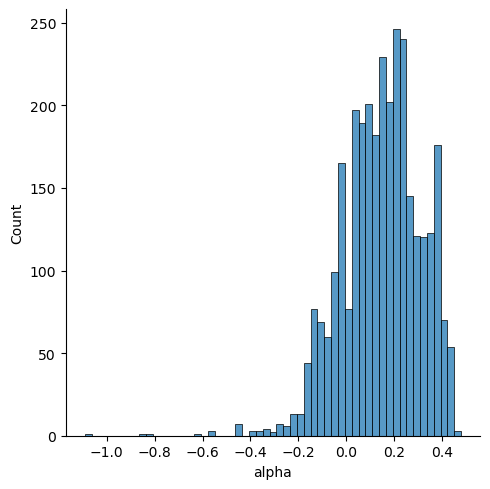

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(m['alpha'])

In [85]:
m['BOA_RT']=m['BOA_RT'].astype(float)

##### We will duplicate data in order to make modele more robust in this range of values :

In [86]:
y=m['alpha']
X=m.drop(columns=['alpha','BOA_RT'])
z=m['BOA_RT']

n_copies = 120
X_augmented = []
y_augmented = []
z_augmented = []

for _ in range(n_copies):
    noise = np.random.normal(loc=0.0, scale=0.01, size=X.shape)  # petit bruit
    X_aug = X.values + noise
    X_augmented.append(X)
    y_augmented.append(y.values)
    z_augmented.append(z.values)
    

# Concaténer
X_augmented = pd.DataFrame(np.vstack(X_augmented), columns=X.columns)
y_augmented = pd.Series(np.hstack(y_augmented))
z_augmented = pd.Series(np.hstack(z_augmented))

X = pd.concat([X, X_augmented], ignore_index=True)
y = pd.concat([y, y_augmented], ignore_index=True)
z = pd.concat([z, z_augmented], ignore_index=True)

In [87]:
X

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,43.0,120.0,0.44,0.899265,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,43.0,120.0,0.33,0.898916,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,43.0,120.0,0.44,0.898567,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,43.0,120.0,0.44,0.898218,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,43.0,120.0,0.44,0.897869,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381629,0.965095,0.968960,0.971809,0.939611,0.035529,0.473527,0.444931,87.0,100.0,0.97,0.951031,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105
381630,0.968948,0.892502,0.970707,0.934456,0.031544,0.453603,0.423872,87.0,100.0,0.97,0.950494,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105
381631,0.972286,0.990740,0.969826,0.929576,0.028105,0.435058,0.404419,87.0,100.0,0.97,0.949958,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105
381632,0.975190,0.829840,0.969136,0.924956,0.025123,0.417762,0.386412,87.0,100.0,0.97,0.949421,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105


In [88]:
X['alpha']=y.values
X['BOA_RT']=z.values

##### Add the other split of data :

In [89]:
for i in range(1, 16):
    globals()[f"m{i}_li"] = globals()[f"m{i}"].iloc[190:]
for i in range(16, 32):
    globals()[f"m{i}_li"] = globals()[f"m{i}"].iloc[19:]


In [90]:
m = pd.concat([globals()[f"m{i}_li"] for i in range(1, 32)], ignore_index=True)
X=pd.concat([X,m],ignore_index=True)
X

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,alpha,BOA_RT
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,43.0,120.0,0.44,0.899265,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.238983,836.718701
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,43.0,120.0,0.33,0.898916,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.280518,820.043398
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,43.0,120.0,0.44,0.898567,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.235626,842.547214
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,43.0,120.0,0.44,0.898218,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.233881,845.666698
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,43.0,120.0,0.44,0.897869,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.232305,847.714982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395075,0.999700,0.696015,0.989030,0.833449,0.000300,0.066229,0.055198,87.0,100.0,0.97,0.886587,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,-2.619671,18.553007
395076,0.999787,0.600386,0.989030,0.831998,0.000213,0.065657,0.054626,87.0,100.0,0.97,0.887965,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,-3.040482,8.200874
395077,0.999800,0.559752,0.989030,0.830522,0.000200,0.065085,0.054054,87.0,100.0,0.97,0.889343,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,-3.134950,5.954587
395078,0.999800,0.504981,0.989030,0.829124,0.000200,0.064552,0.053522,87.0,100.0,0.97,0.890720,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,-3.202179,3.868996


In [91]:
m_li=pd.concat([globals()[f"m{i}_li"] for i in range(1, 32)], ignore_index=True)
y_li=m_li['alpha']
X_li=m_li.drop(columns=['alpha','BOA_RT'])
z_li=m_li['BOA_RT']

n_copies = 20
X_augmented = []
y_augmented = []
z_augmented = []

for _ in range(n_copies):
    noise = np.random.normal(loc=0.0, scale=0.01, size=X_li.shape)  # petit bruit
    X_aug = X_li.values + noise
    X_augmented.append(X_li)
    y_augmented.append(y_li.values)
    z_augmented.append(z_li.values)
    

# Concaténer
X_augmented = pd.DataFrame(np.vstack(X_augmented), columns=X_li.columns)
y_augmented = pd.Series(np.hstack(y_augmented))
z_augmented = pd.Series(np.hstack(z_augmented))

X_li = pd.concat([X_li, X_augmented], ignore_index=True)
y_li = pd.concat([y_li, y_augmented], ignore_index=True)
z_li = pd.concat([z_li, z_augmented], ignore_index=True)

X_li['alpha']=y_li.values
X_li['BOA_RT']=z_li.values

In [92]:
X=pd.concat([X,X_li],ignore_index=True)
X

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,alpha,BOA_RT
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,43.0,120.0,0.44,0.899265,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.238983,836.718701
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,43.0,120.0,0.33,0.898916,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.280518,820.043398
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,43.0,120.0,0.44,0.898567,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.235626,842.547214
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,43.0,120.0,0.44,0.898218,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.233881,845.666698
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,43.0,120.0,0.44,0.897869,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.232305,847.714982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677441,0.999700,0.696015,0.989030,0.833449,0.000300,0.066229,0.055198,87.0,100.0,0.97,0.886587,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,-2.619671,18.553007
677442,0.999787,0.600386,0.989030,0.831998,0.000213,0.065657,0.054626,87.0,100.0,0.97,0.887965,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,-3.040482,8.200874
677443,0.999800,0.559752,0.989030,0.830522,0.000200,0.065085,0.054054,87.0,100.0,0.97,0.889343,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,-3.134950,5.954587
677444,0.999800,0.504981,0.989030,0.829124,0.000200,0.064552,0.053522,87.0,100.0,0.97,0.890720,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,-3.202179,3.868996


In [93]:
X.to_csv('add_training.csv',index=False)

In [94]:
X

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,alpha,BOA_RT
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,43.0,120.0,0.44,0.899265,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.238983,836.718701
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,43.0,120.0,0.33,0.898916,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.280518,820.043398
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,43.0,120.0,0.44,0.898567,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.235626,842.547214
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,43.0,120.0,0.44,0.898218,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.233881,845.666698
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,43.0,120.0,0.44,0.897869,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.232305,847.714982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677441,0.999700,0.696015,0.989030,0.833449,0.000300,0.066229,0.055198,87.0,100.0,0.97,0.886587,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,-2.619671,18.553007
677442,0.999787,0.600386,0.989030,0.831998,0.000213,0.065657,0.054626,87.0,100.0,0.97,0.887965,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,-3.040482,8.200874
677443,0.999800,0.559752,0.989030,0.830522,0.000200,0.065085,0.054054,87.0,100.0,0.97,0.889343,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,-3.134950,5.954587
677444,0.999800,0.504981,0.989030,0.829124,0.000200,0.064552,0.053522,87.0,100.0,0.97,0.890720,0.052336,707.900000,3185.55,0.063427,0.055172,15.591942,17.241105,-3.202179,3.868996


In [131]:
X['R_scene'].unique()

array([0.44, 0.33, 0.67, 0.8 , 0.54, 0.15, 0.3 , 0.73, 0.1 , 0.95, 0.99])

In [138]:
m10

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,BOA_RT,alpha
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,88.0,0.0,0.95,0.899265,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,345.220508,0.053653
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,88.0,0.0,0.95,0.898916,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,348.096861,0.054844
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,88.0,0.0,0.95,0.898567,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,348.986628,0.054997
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,88.0,0.0,0.95,0.898218,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,351.460726,0.056148
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,88.0,0.0,0.95,0.897869,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,351.332208,0.055862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.999800,0.197184,0.994500,0.827687,0.000200,0.032007,0.026492,88.0,0.0,0.95,0.892167,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.172156,-4.330499
996,0.999800,0.083891,0.994500,0.827621,0.000200,0.031995,0.026479,88.0,0.0,0.95,0.892305,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.039905,-4.332465
997,0.999800,0.046852,0.994500,0.827130,0.000200,0.031904,0.026389,88.0,0.0,0.95,0.892443,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.016363,-4.347116
998,0.999800,0.221548,0.994500,0.827130,0.000200,0.031904,0.026388,88.0,0.0,0.95,0.892580,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.214222,-4.347143


In [165]:
X['R_scene'].unique()

array([0.44, 0.33, 0.67, 0.8 , 0.54, 0.15, 0.3 , 0.73, 0.1 , 0.95, 0.99])

In [166]:
X['Z'].unique()

array([120., 890.,  59.,  10.,   0.,  17.,  78., 250., 520.])

In [167]:
X['SZA'].unique()

array([43., 63., 15., 60., 75., 22., 84., 42., 88.])

In [5]:
X=pd.read_csv('add_training.csv')
X

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,alpha,BOA_RT
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,43.0,120.0,0.44,0.899265,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.425436,756.142020
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,43.0,120.0,0.33,0.898916,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.423998,760.039985
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,43.0,120.0,0.44,0.898567,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.422639,763.205746
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,43.0,120.0,0.44,0.898218,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.421195,766.900471
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,43.0,120.0,0.44,0.897869,0.731354,707.902222,3185.56,0.731802,0.731453,1.348391,1.287525,0.419869,769.642902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301795,0.999800,0.197184,0.994500,0.827687,0.000200,0.032007,0.026492,88.0,520.0,0.99,0.892167,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,NaN,NaN
301796,0.999800,0.083891,0.994500,0.827621,0.000200,0.031995,0.026479,88.0,520.0,0.99,0.892305,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,NaN,NaN
301797,0.999800,0.046852,0.994500,0.827130,0.000200,0.031904,0.026389,88.0,520.0,0.99,0.892443,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,NaN,NaN
301798,0.999800,0.221548,0.994500,0.827130,0.000200,0.031904,0.026388,88.0,520.0,0.99,0.892580,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435,NaN,NaN


In [95]:
m10

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,BOA_RT,alpha
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,88.0,0.0,0.95,0.899265,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,425.413049,0.026182
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,88.0,0.0,0.95,0.898916,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,427.984366,0.027139
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,88.0,0.0,0.95,0.898567,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,428.097317,0.027260
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,88.0,0.0,0.95,0.898218,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,430.186024,0.028191
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,88.0,0.0,0.95,0.897869,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,429.069376,0.027958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.999800,0.197184,0.994500,0.827687,0.000200,0.032007,0.026492,88.0,0.0,0.95,0.892167,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.172223,-4.330499
996,0.999800,0.083891,0.994500,0.827621,0.000200,0.031995,0.026479,88.0,0.0,0.95,0.892305,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.039913,-4.332465
997,0.999800,0.046852,0.994500,0.827130,0.000200,0.031904,0.026389,88.0,0.0,0.95,0.892443,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.016365,-4.347116
998,0.999800,0.221548,0.994500,0.827130,0.000200,0.031904,0.026388,88.0,0.0,0.95,0.892580,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959,0.214313,-4.347143


In [8]:
m11

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a
0,0.700177,0.996633,0.979355,0.952953,0.356422,0.443398,0.422537,88.0,520.0,0.99,0.899265,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
1,0.705562,0.997046,0.979431,0.952886,0.348761,0.441122,0.420339,88.0,520.0,0.99,0.898916,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
2,0.710843,0.996835,0.979506,0.952818,0.341304,0.438861,0.418154,88.0,520.0,0.99,0.898567,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
3,0.716019,0.997149,0.979600,0.952797,0.334048,0.436643,0.416032,88.0,520.0,0.99,0.898218,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
4,0.721094,0.996654,0.979680,0.952744,0.326985,0.434425,0.413896,88.0,520.0,0.99,0.897869,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.999800,0.197184,0.994500,0.827687,0.000200,0.032007,0.026492,88.0,520.0,0.99,0.892167,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
996,0.999800,0.083891,0.994500,0.827621,0.000200,0.031995,0.026479,88.0,520.0,0.99,0.892305,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
997,0.999800,0.046852,0.994500,0.827130,0.000200,0.031904,0.026389,88.0,520.0,0.99,0.892443,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435
998,0.999800,0.221548,0.994500,0.827130,0.000200,0.031904,0.026388,88.0,520.0,0.99,0.892580,0.034899,707.946667,3185.76,0.049215,0.038925,19.178172,19.808435


In [21]:
m12=pd.read_csv('new_samples_features_12.csv')
m16=pd.read_csv('new_samples_features_16.csv')

In [22]:
m16

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a
0,0.722112,0.996750,0.979710,0.952705,0.325575,0.433419,0.412921,80.0,40.0,0.78,0.897695,0.173648,707.893333,3185.52,0.177502,0.17452,5.608755,5.616535
1,0.767422,0.996321,0.980466,0.952189,0.264718,0.412601,0.392874,80.0,40.0,0.78,0.894206,0.173648,707.893333,3185.52,0.177502,0.17452,5.608755,5.616535
2,0.804517,0.994788,0.981173,0.951724,0.217513,0.393706,0.374699,80.0,40.0,0.78,0.890717,0.173648,707.893333,3185.52,0.177502,0.17452,5.608755,5.616535
3,0.834915,0.991225,0.981829,0.951291,0.180426,0.376480,0.358142,80.0,40.0,0.78,0.887228,0.173648,707.893333,3185.52,0.177502,0.17452,5.608755,5.616535
4,0.859889,0.987860,0.982447,0.950904,0.150952,0.360701,0.342992,80.0,40.0,0.78,0.883739,0.173648,707.893333,3185.52,0.177502,0.17452,5.608755,5.616535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.999700,0.340903,0.994500,0.833449,0.000300,0.033114,0.027599,80.0,40.0,0.78,0.886587,0.173648,707.893333,3185.52,0.177502,0.17452,5.608755,5.616535
96,0.999776,0.235456,0.994500,0.831998,0.000224,0.032828,0.027313,80.0,40.0,0.78,0.887965,0.173648,707.893333,3185.52,0.177502,0.17452,5.608755,5.616535
97,0.999800,0.168870,0.994500,0.830522,0.000200,0.032542,0.027027,80.0,40.0,0.78,0.889343,0.173648,707.893333,3185.52,0.177502,0.17452,5.608755,5.616535
98,0.999800,0.089320,0.994500,0.829124,0.000200,0.032276,0.026761,80.0,40.0,0.78,0.890720,0.173648,707.893333,3185.52,0.177502,0.17452,5.608755,5.616535


In [11]:
m13

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a
0,0.699033,0.996390,0.959137,0.952953,0.358058,0.886796,0.845075,88.0,0.0,0.95,0.899265,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959
1,0.704434,0.996948,0.959286,0.952886,0.350361,0.882245,0.840678,88.0,0.0,0.95,0.898916,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959
2,0.709732,0.996737,0.959433,0.952818,0.342868,0.877722,0.836309,88.0,0.0,0.95,0.898567,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959
3,0.714923,0.997051,0.959616,0.952797,0.335580,0.873287,0.832065,88.0,0.0,0.95,0.898218,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959
4,0.720012,0.996566,0.959773,0.952744,0.328487,0.868850,0.827792,88.0,0.0,0.95,0.897869,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.999800,0.001425,0.989030,0.827687,0.000200,0.064014,0.052983,88.0,0.0,0.95,0.892167,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959
996,0.999800,0.000108,0.989030,0.827621,0.000200,0.063989,0.052959,88.0,0.0,0.95,0.892305,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959
997,0.999800,0.000060,0.989030,0.827130,0.000200,0.063807,0.052777,88.0,0.0,0.95,0.892443,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959
998,0.999800,0.001681,0.989030,0.827130,0.000200,0.063807,0.052777,88.0,0.0,0.95,0.892580,0.034899,707.888889,3185.5,0.049216,0.038926,20.318507,25.689959


In [14]:
n10=pd.read_csv('new_10.csv')
n13=pd.read_csv('new_13.csv')

In [15]:
n10

,Central_wavelength,0.40104999999999996,0.40315,0.40524999999999994,0.40735,0.4094499999999999,0.41155,0.41365,0.41575,0.41784999999999994,...,2.48005,2.4821499999999994,2.48425,2.4863500000000003,2.48845,2.4905500000000003,2.49265,2.4947500000000002,2.49685,2.4989500000000002
0,myCurve_2,345.220508,348.096861,348.986628,351.460726,351.332208,353.975382,354.164431,357.523519,358.470522,...,0.217625,0.192701,0.045849,0.21788,0.023271,0.172156,0.039905,0.016363,0.214222,0.354898


In [17]:
n13

,Central_wavelength,0.40104999999999996,0.40315,0.40524999999999994,0.40735,0.4094499999999999,0.41155,0.41365,0.41575,0.41784999999999994,...,2.48005,2.4821499999999994,2.48425,2.4863500000000003,2.48845,2.4905500000000003,2.49265,2.4947500000000002,2.49685,2.4989500000000002
0,myCurve_2,307.895579,310.41397,311.041037,313.072079,312.828864,314.974287,314.922821,317.670009,318.34703,...,0.001496,0.000565,0.00007,0.000937,0.000008,0.000321,0.000015,0.000008,0.000391,0.001287


In [19]:
n16=pd.read_csv('new_16.csv')

In [20]:
n16

,Central_wavelength,0.4105,0.43149999999999994,0.4525,0.4735,0.4944999999999999,0.5155,0.5365000000000001,0.5575,0.5784999999999999,...,2.3005000000000004,2.3215,2.3425,2.3635,2.3844999999999996,2.4055,2.4264999999999994,2.4475,2.4685,2.4894999999999996
0,myCurve_0,450.318161,475.91809,497.040703,510.155583,521.906765,524.761561,517.732094,519.911532,474.874547,...,359.808488,246.707255,96.071408,50.092582,8.754906,3.188576,0.695392,0.250005,0.063392,0.000257


In [68]:
m=pd.read_csv('new_samples_features_30.csv')

In [69]:
m

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scene,...,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,gas_model,kg,ka
0,0.722112,0.996750,0.979710,0.952705,0.325575,0.433419,0.412921,45.0,100.0,0.15,...,0.707107,707.9,3185.55,0.707605,0.707218,1.397602,1.345031,TROPICAL,2.0,1.0
1,0.767422,0.996321,0.980466,0.952189,0.264718,0.412601,0.392874,45.0,100.0,0.15,...,0.707107,707.9,3185.55,0.707605,0.707218,1.397602,1.345031,NaN,NaN,NaN
2,0.804517,0.994788,0.981173,0.951724,0.217513,0.393706,0.374699,45.0,100.0,0.15,...,0.707107,707.9,3185.55,0.707605,0.707218,1.397602,1.345031,NaN,NaN,NaN
3,0.834915,0.991225,0.981829,0.951291,0.180426,0.376480,0.358142,45.0,100.0,0.15,...,0.707107,707.9,3185.55,0.707605,0.707218,1.397602,1.345031,NaN,NaN,NaN
4,0.859889,0.987860,0.982447,0.950904,0.150952,0.360701,0.342992,45.0,100.0,0.15,...,0.707107,707.9,3185.55,0.707605,0.707218,1.397602,1.345031,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.999700,0.340903,0.994500,0.833449,0.000300,0.033114,0.027599,45.0,100.0,0.15,...,0.707107,707.9,3185.55,0.707605,0.707218,1.397602,1.345031,NaN,NaN,NaN
96,0.999776,0.235456,0.994500,0.831998,0.000224,0.032828,0.027313,45.0,100.0,0.15,...,0.707107,707.9,3185.55,0.707605,0.707218,1.397602,1.345031,NaN,NaN,NaN
97,0.999800,0.168870,0.994500,0.830522,0.000200,0.032542,0.027027,45.0,100.0,0.15,...,0.707107,707.9,3185.55,0.707605,0.707218,1.397602,1.345031,NaN,NaN,NaN
98,0.999800,0.089320,0.994500,0.829124,0.000200,0.032276,0.026761,45.0,100.0,0.15,...,0.707107,707.9,3185.55,0.707605,0.707218,1.397602,1.345031,NaN,NaN,NaN
